In [10]:
#1. SET UP THE DATABASE

#import necessary libraries
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#verify directory and database path
current_dir = os.getcwd()
print("Current Directory:", current_dir)

#set working directory to the home directory
home_dir = os.path.expanduser('~')
os.chdir(home_dir)

#verify the change
current_dir = os.getcwd()
print("Updated Working Directory:", current_dir)

#create the database path
db_path = os.path.join(current_dir, 'student_grades.db')
print("Database Path:", db_path)

#connect to the sqlite database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

Current Directory: /Users/ciarafasullo
Updated Working Directory: /Users/ciarafasullo
Database Path: /Users/ciarafasullo/student_grades.db


In [11]:
#2. CREATE THE NECESSARY TABLES

#create tables
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students (student_id)
)
''')

In [12]:
#commit changes and close the connection
conn.commit()
conn.close()

In [13]:
#3. INSERT DATA INTO THE TABLES

#reconnect to the database
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

#insert data into the students table
students_data = [
    ('Alice', 'Johnson'),
    ('Bob', 'Smith'),
    ('Carol', 'White'),
    ('David', 'Brown'),
    ('Eve', 'Davis')
]
cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

#insert data into the grades table
grades_data = [
    (1, 'Math', 95),
    (1, 'English', 88),
    (1, 'History', 90),
    (2, 'Math', 82),
    (2, 'English', 76),
    (2, 'History', 85),
    (3, 'Math', 89),
    (3, 'English', 91),
    (3, 'History', 87),
    (4, 'Math', 74),
    (4, 'English', 80),
    (4, 'History', 78),
    (5, 'Math', 92),
    (5, 'English', 87),
    (5, 'History', 85)
]
cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?, ?)
''', grades_data)



In [14]:
#commit changes and close the connection
conn.commit()
conn.close()

In [15]:
#4. PERFORM SQL QUERIES

#reconnect to the database
conn = sqlite3.connect(db_path)

#query 1: retrieve all students' names and their grades
query1 = '''
SELECT s.first_name, s.last_name, g.subject, g.grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
'''
df1 = pd.read_sql_query(query1, conn)
print("All Students' Names and Their Grades:")
print(df1)

#query 2: find the average grade for each student
query2 = '''
SELECT s.first_name, s.last_name, AVG(g.grade) as average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
'''
df2 = pd.read_sql_query(query2, conn)
print("\nAverage Grade for Each Student:")
print(df2)

#query 3: find the student with the highest average grade
query3 = '''
SELECT s.first_name, s.last_name, AVG(g.grade) as average_grade
FROM students s
JOIN grades g ON s.student_id = g.student_id
GROUP BY s.student_id
ORDER BY average_grade DESC
LIMIT 1
'''
df3 = pd.read_sql_query(query3, conn)
print("\nStudent with the Highest Average Grade:")
print(df3)

#query 4: find the average grade for the math subject
query4 = '''
SELECT AVG(g.grade) as average_math_grade
FROM grades g
WHERE g.subject = 'Math'
'''
df4 = pd.read_sql_query(query4, conn)
print("\nAverage Grade for Math Subject:")
print(df4)

#query 5: list all students who scored above 90 in any subject
query5 = '''
SELECT DISTINCT s.first_name, s.last_name
FROM students s
JOIN grades g ON s.student_id = g.student_id
WHERE g.grade > 90
'''
df5 = pd.read_sql_query(query5, conn)
print("\nStudents Who Scored Above 90 in Any Subject:")
print(df5)

All Students' Names and Their Grades:
   first_name last_name  subject  grade
0       Alice   Johnson     Math     95
1       Alice   Johnson  English     88
2       Alice   Johnson  History     90
3         Bob     Smith     Math     82
4         Bob     Smith  English     76
5         Bob     Smith  History     85
6       Carol     White     Math     89
7       Carol     White  English     91
8       Carol     White  History     87
9       David     Brown     Math     74
10      David     Brown  English     80
11      David     Brown  History     78
12        Eve     Davis     Math     92
13        Eve     Davis  English     87
14        Eve     Davis  History     85
15      Alice   Johnson     Math     95
16      Alice   Johnson  English     88
17      Alice   Johnson  History     90
18        Bob     Smith     Math     82
19        Bob     Smith  English     76
20        Bob     Smith  History     85
21      Carol     White     Math     89
22      Carol     White  English     91
23

In [16]:
#close the connection
conn.close()

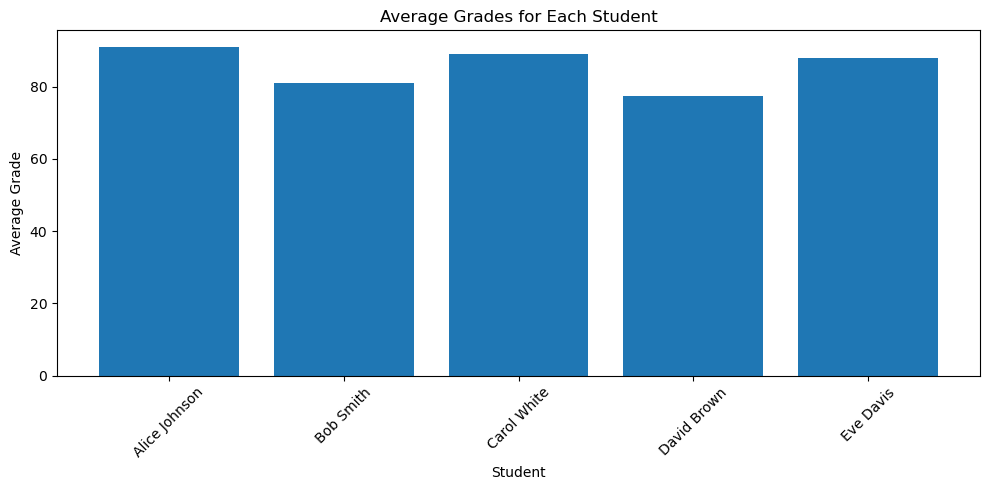

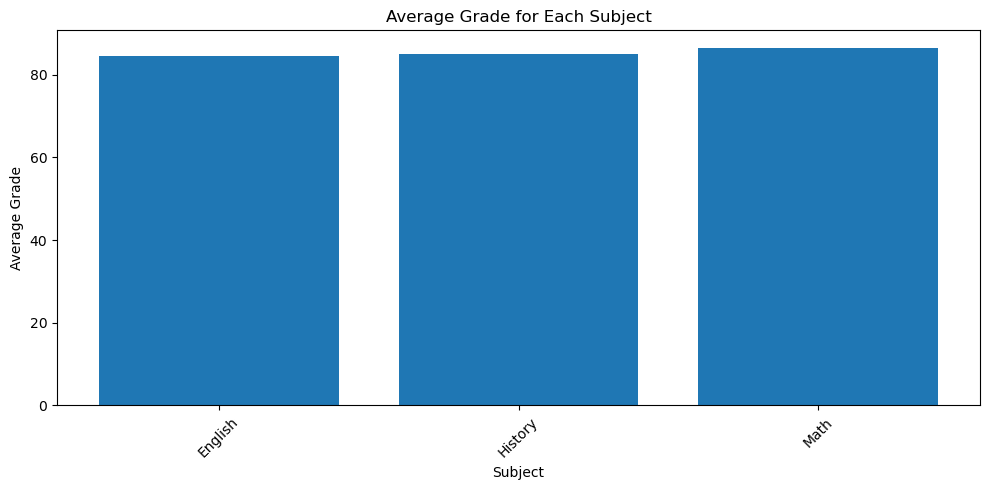

In [17]:
#5. LOAD DATA INTO PANDAS

#reconnect to the database
conn = sqlite3.connect(db_path)

#load data into dataframes
students_df = pd.read_sql_query('SELECT * FROM students', conn)
grades_df = pd.read_sql_query('SELECT * FROM grades', conn)

#join the dataframes
combined_df = pd.merge(students_df, grades_df, on='student_id')

#average grades for each student
avg_grades_per_student = combined_df.groupby(['first_name', 'last_name'])['grade'].mean().reset_index()

#average grades for each subject
avg_grades_per_subject = combined_df.groupby('subject')['grade'].mean().reset_index()

#plot average grades for each student
plt.figure(figsize=(10, 5))
plt.bar(avg_grades_per_student['first_name'] + ' ' + avg_grades_per_student['last_name'], avg_grades_per_student['grade'])
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grades for Each Student')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#plot average grades for each subject
plt.figure(figsize=(10, 5))
plt.bar(avg_grades_per_subject['subject'], avg_grades_per_subject['grade'])
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Each Subject')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#close the connection
conn.close()

In [19]:
#BONUS TASK

#connect to the sqlite database
conn = sqlite3.connect('student_grades.db')
cursor = conn.cursor()

#write a query to find the student with the highest grade in each subject
query = '''
SELECT g.subject, s.first_name, s.last_name, g.grade
FROM grades g
JOIN students s ON g.student_id = s.student_id
WHERE g.grade = (
    SELECT MAX(g2.grade)
    FROM grades g2
    WHERE g2.subject = g.subject
)
'''

#execute the query and fetch results
df = pd.read_sql_query(query, conn)

In [20]:
#close the connection
conn.close()

In [21]:
#display the dataframe
print(df)

   subject first_name last_name  grade
0     Math      Alice   Johnson     95
1  History      Alice   Johnson     90
2  English      Carol     White     91
3     Math      Alice   Johnson     95
4  History      Alice   Johnson     90
5  English      Carol     White     91


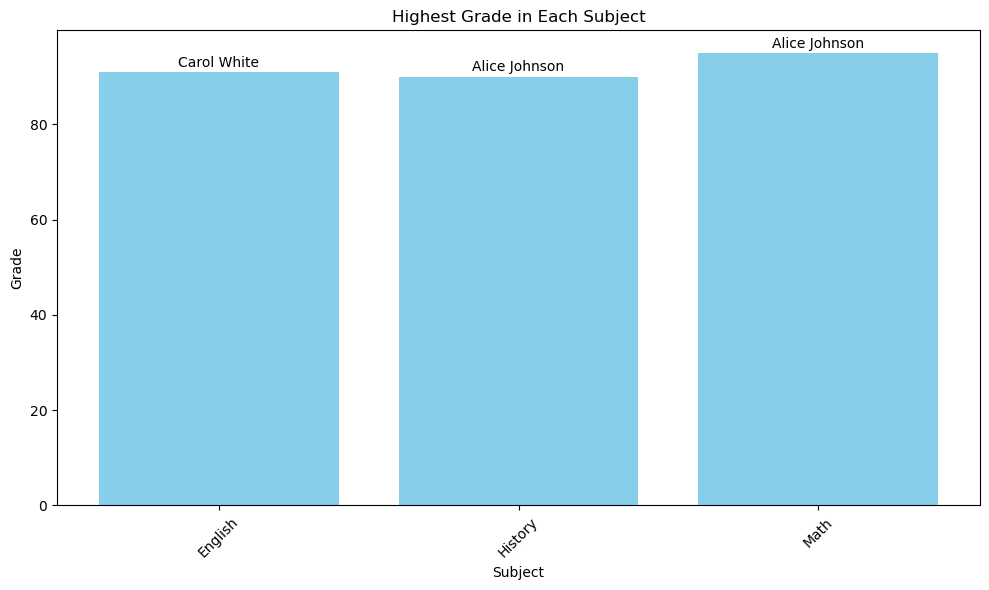

In [22]:
#prep data for visualization
subject_groups = df.groupby('subject')
subjects = subject_groups.size().index
grades = [subject_groups.get_group(subject)['grade'].values[0] for subject in subjects]
students = [f"{subject_groups.get_group(subject)['first_name'].values[0]} {subject_groups.get_group(subject)['last_name'].values[0]}" for subject in subjects]

#plot the grouped bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(subjects, grades, color='skyblue')

#add labels and title
plt.xlabel('Subject')
plt.ylabel('Grade')
plt.title('Highest Grade in Each Subject')
plt.xticks(rotation=45)

#add the student names as labels on top of the bars
for bar, student in zip(bars, students):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, student,
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()